In [1]:
import pandas as pd
import warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv("students.csv")
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine_learning
0,1,sara,25,F,IT,45,48
1,2,lara,26,F,IT,45,47
2,3,kiara,28,F,Non-IT,35,36
3,4,rahul,32,M,Non-IT,42,41
4,5,sachin,30,M,Non-IT,20,38


**Column Selection in Pandas**

1.Dot Notation (Not Recommended) 

2.Bracket Notation

In [3]:
df.Python #Column name is case sensative

0    45
1    45
2    35
3    42
4    20
5    40
6    25
7    28
8    36
9    22
Name: Python, dtype: int64

In [4]:
df["Python"]

0    45
1    45
2    35
3    42
4    20
5    40
6    25
7    28
8    36
9    22
Name: Python, dtype: int64

In [5]:
df[["Name","Age","Gender"]]
# in dot notation you can not select multiple columns hence not recommended

,Name,Age,Gender
0,sara,25,F
1,lara,26,F
2,kiara,28,F
3,rahul,32,M
4,sachin,30,M
5,sarika,33,F
6,dhanashri,35,F
7,naush,34,M
8,aditya,30,M
9,nishant,28,M


**Creating or Adding new column in pandas**

dataframes are nothing but dictionaries. So adding values to it is similar to that of adding values in dictionaries.

i.e. using key & value 

In [6]:
cities=["mumbai","pune","sangli","nagpur","nashik","banglore","chennai","surat","delhi","thane"]
df["city"]=cities
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city
0,1,sara,25,F,IT,45,48,mumbai
1,2,lara,26,F,IT,45,47,pune
2,3,kiara,28,F,Non-IT,35,36,sangli
3,4,rahul,32,M,Non-IT,42,41,nagpur
4,5,sachin,30,M,Non-IT,20,38,nashik


**Vectorization in Pandas**

Here we will calculate the total marks by adding marks in python and machine learning also we will add this total column to our dataframe.

In [7]:
total=df["Python"]+df["Machine_learning"]
df["Total"]=total 
df

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city,Total
0,1,sara,25,F,IT,45,48,mumbai,93
1,2,lara,26,F,IT,45,47,pune,92
2,3,kiara,28,F,Non-IT,35,36,sangli,71
3,4,rahul,32,M,Non-IT,42,41,nagpur,83
4,5,sachin,30,M,Non-IT,20,38,nashik,58
5,6,sarika,33,F,Non-IT,40,25,banglore,65
6,7,dhanashri,35,F,IT,25,24,chennai,49
7,8,naush,34,M,IT,28,34,surat,62
8,9,aditya,30,M,Non-IT,36,34,delhi,70
9,10,nishant,28,M,IT,22,27,thane,49


**Use of Apply method**

Here we allot grades based on the total marks

75% ==> A

60% -75% ==> B

35% -60% ==> C

below that fail

In [8]:
def creategrade(marks):
  p=(marks/100)*100
  if (p>=75):
   return "A"
  elif (p>=60 and p<75):
   return "B"
  elif (p>=35 and p<60):
   return "C"
  else:
   return "Fail"

Here we have created the function and then we will apply this function to total column to generate the grades.

In [9]:
creategrade(80)

'A'

In [10]:
creategrade(55)

'C'

In [11]:
df["Total"].apply(creategrade)

0    A
1    A
2    B
3    A
4    C
5    B
6    C
7    B
8    B
9    C
Name: Total, dtype: object

In [12]:
df["Grade"]=df["Total"].apply(creategrade)
df

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city,Total,Grade
0,1,sara,25,F,IT,45,48,mumbai,93,A
1,2,lara,26,F,IT,45,47,pune,92,A
2,3,kiara,28,F,Non-IT,35,36,sangli,71,B
3,4,rahul,32,M,Non-IT,42,41,nagpur,83,A
4,5,sachin,30,M,Non-IT,20,38,nashik,58,C
5,6,sarika,33,F,Non-IT,40,25,banglore,65,B
6,7,dhanashri,35,F,IT,25,24,chennai,49,C
7,8,naush,34,M,IT,28,34,surat,62,B
8,9,aditya,30,M,Non-IT,36,34,delhi,70,B
9,10,nishant,28,M,IT,22,27,thane,49,C


**Value_counts method in pandas**

Frequency of occurance is checked by using value_counts method.

This method is used for categorical columns only.

In [13]:
df["Gender"].value_counts()

F    5
M    5
Name: Gender, dtype: int64

In [14]:
df["Background"].value_counts()

IT        5
Non-IT    5
Name: Background, dtype: int64

In [15]:
df["Grade"].value_counts()

B    4
A    3
C    3
Name: Grade, dtype: int64

You can have graphical representation using value_counts.

<Axes: >

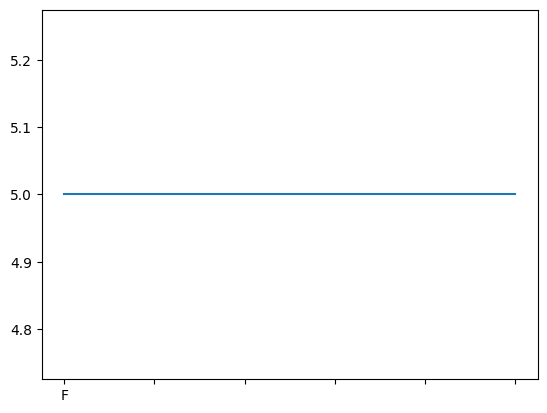

In [16]:
df["Gender"].value_counts().plot()

By default it will have line graph

<Axes: >

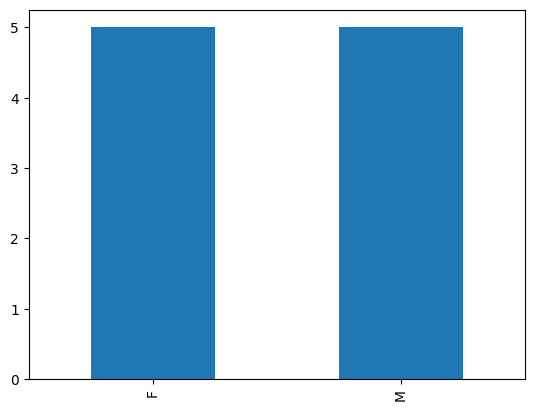

In [17]:
df["Gender"].value_counts().plot(kind="bar")

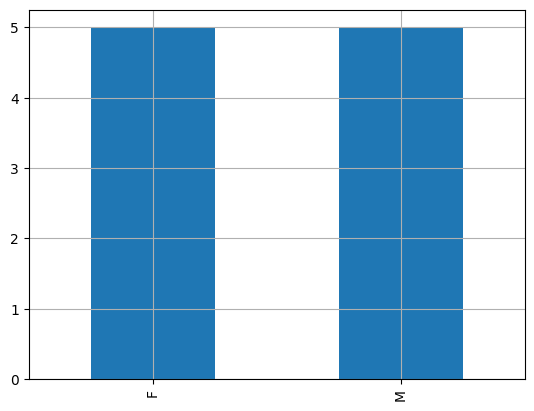

In [18]:
import matplotlib.pyplot as plt
df["Gender"].value_counts().plot(kind="bar")
plt.grid(True)

<Axes: ylabel='Gender'>

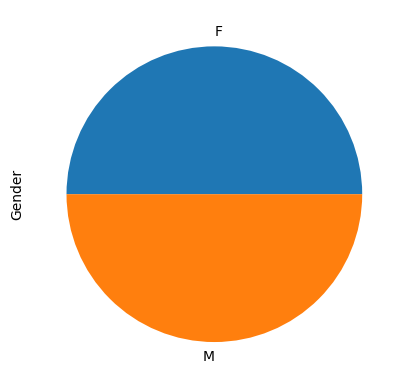

In [19]:
df["Gender"].value_counts().plot(kind="pie")

<Axes: ylabel='Gender'>

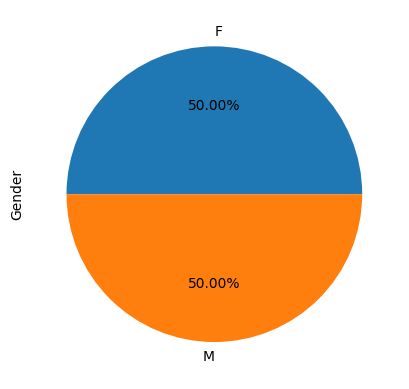

In [20]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%")

**For continuous data visualisation we will use Histogram**

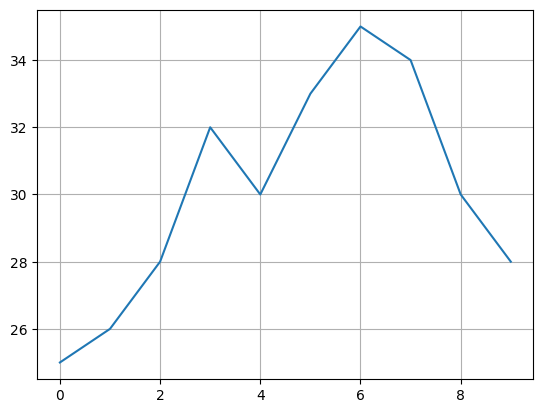

In [21]:
df["Age"].plot()
plt.grid()

<Axes: ylabel='Frequency'>

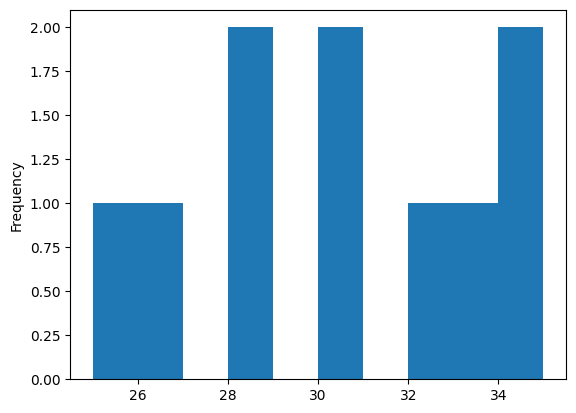

In [22]:
df["Age"].plot(kind="hist")


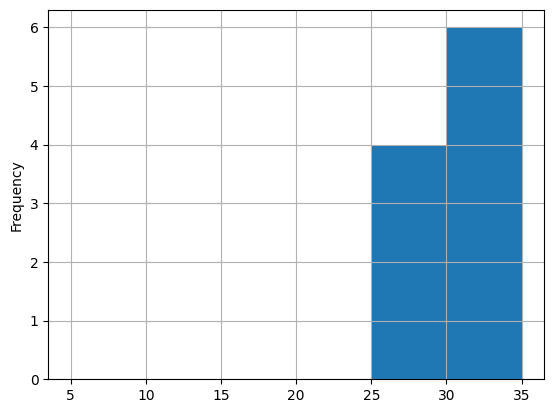

In [23]:
df["Age"].plot(kind="hist",bins=[5,10,15,20,25,30,35])
plt.grid()

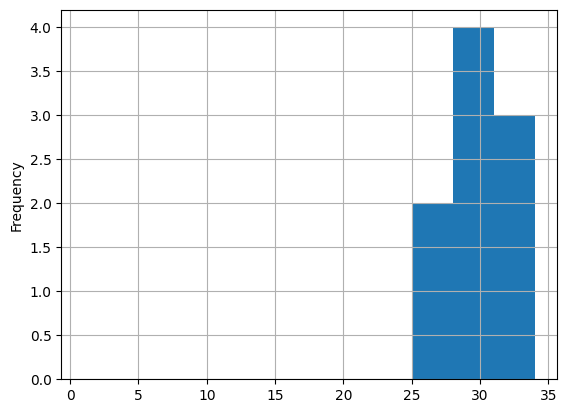

In [24]:
df["Age"].plot(kind="hist",bins=range(1,35,3))
plt.grid()

Most of the values are ranging in between 30 to 35 yrs 

In [25]:
df.corr()["Total"].sort_values()

Rank               -0.793456
Age                -0.593495
Machine_learning    0.877388
Python              0.903002
Total               1.000000
Name: Total, dtype: float64

df.corr() ==> method will give you the corelation between two attributes 

Here Rank & Age columns are strongly co-related with Total column; which is obvious.

Python & Machine_learning are strongly co-related since Total is nothing but the addition of this two attributes.

<Axes: xlabel='Python', ylabel='Total'>

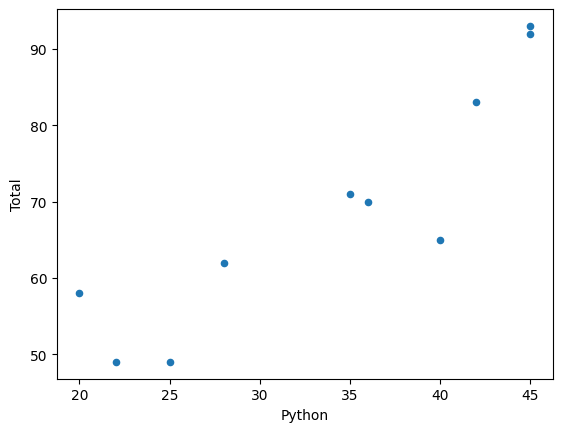

In [26]:
df.plot.scatter("Python","Total")

<Axes: xlabel='Machine_learning', ylabel='Total'>

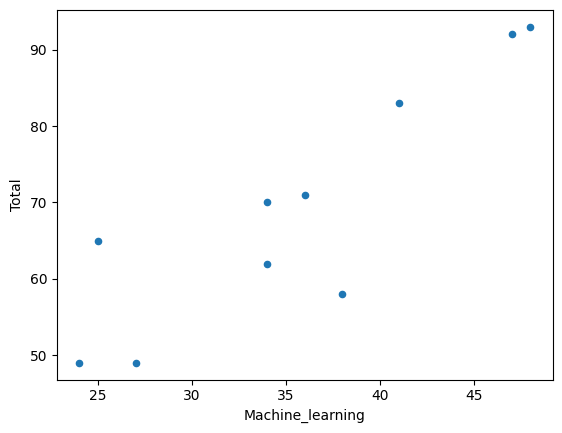

In [27]:
df.plot.scatter("Machine_learning","Total")

<Axes: xlabel='Total', ylabel='Total'>

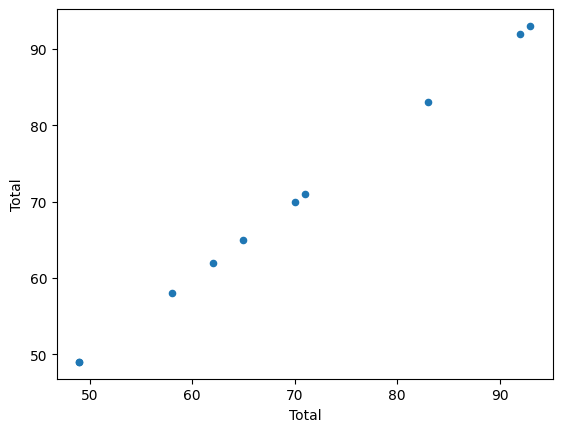

In [28]:
df.plot.scatter("Total","Total")

The above visulization are giving straight line approximately.

More the straighter line stronger the corelation between them.

In [29]:
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city,Total,Grade
0,1,sara,25,F,IT,45,48,mumbai,93,A
1,2,lara,26,F,IT,45,47,pune,92,A
2,3,kiara,28,F,Non-IT,35,36,sangli,71,B
3,4,rahul,32,M,Non-IT,42,41,nagpur,83,A
4,5,sachin,30,M,Non-IT,20,38,nashik,58,C


**Slicing columns**

using loc & iloc (location & indexlocation)

In loc we use column names for fetching the data (label based indexing)

In iloc we use index numbers for fetching the data ( Index based indexing)


Consider if we want to fetch the value sangli from city column

In [30]:
#using loc
df.loc[2,"city"]
# here 2 is the index of row and city is name of column

'sangli'

In [31]:
df.loc[:,"Name":"Machine_learning"]
#all rows and customized columns 
# here in loc start and end both are inclusive 
#syntax
# df.loc[start row:end row,start col:end col]

,Name,Age,Gender,Background,Python,Machine_learning
0,sara,25,F,IT,45,48
1,lara,26,F,IT,45,47
2,kiara,28,F,Non-IT,35,36
3,rahul,32,M,Non-IT,42,41
4,sachin,30,M,Non-IT,20,38
5,sarika,33,F,Non-IT,40,25
6,dhanashri,35,F,IT,25,24
7,naush,34,M,IT,28,34
8,aditya,30,M,Non-IT,36,34
9,nishant,28,M,IT,22,27


In [32]:
df.head()

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city,Total,Grade
0,1,sara,25,F,IT,45,48,mumbai,93,A
1,2,lara,26,F,IT,45,47,pune,92,A
2,3,kiara,28,F,Non-IT,35,36,sangli,71,B
3,4,rahul,32,M,Non-IT,42,41,nagpur,83,A
4,5,sachin,30,M,Non-IT,20,38,nashik,58,C


In [33]:
df.loc[:,["Rank","Name","Total"]]
# Here we can also slice the columns leaving some columns in between

,Rank,Name,Total
0,1,sara,93
1,2,lara,92
2,3,kiara,71
3,4,rahul,83
4,5,sachin,58
5,6,sarika,65
6,7,dhanashri,49
7,8,naush,62
8,9,aditya,70
9,10,nishant,49


**In iloc we use index numbers for fetching the data ( Index based indexing)**

In [34]:
df.iloc[:,:7]
# all rows and columns starting from index 0 to 6
# here end is exclusive

,Rank,Name,Age,Gender,Background,Python,Machine_learning
0,1,sara,25,F,IT,45,48
1,2,lara,26,F,IT,45,47
2,3,kiara,28,F,Non-IT,35,36
3,4,rahul,32,M,Non-IT,42,41
4,5,sachin,30,M,Non-IT,20,38
5,6,sarika,33,F,Non-IT,40,25
6,7,dhanashri,35,F,IT,25,24
7,8,naush,34,M,IT,28,34
8,9,aditya,30,M,Non-IT,36,34
9,10,nishant,28,M,IT,22,27


**In iloc -ve indexing is also supported.**

let suppose we want columns till total in X variable.

and Grade column in Y variable

In [35]:
x=df.iloc[:,:-1]
x
# you will get data frame 2D

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city,Total
0,1,sara,25,F,IT,45,48,mumbai,93
1,2,lara,26,F,IT,45,47,pune,92
2,3,kiara,28,F,Non-IT,35,36,sangli,71
3,4,rahul,32,M,Non-IT,42,41,nagpur,83
4,5,sachin,30,M,Non-IT,20,38,nashik,58
5,6,sarika,33,F,Non-IT,40,25,banglore,65
6,7,dhanashri,35,F,IT,25,24,chennai,49
7,8,naush,34,M,IT,28,34,surat,62
8,9,aditya,30,M,Non-IT,36,34,delhi,70
9,10,nishant,28,M,IT,22,27,thane,49


In [36]:
y=df.iloc[:,-1]
y
# you will get series 1D

0    A
1    A
2    B
3    A
4    C
5    B
6    C
7    B
8    B
9    C
Name: Grade, dtype: object

**Dropping a column**

In [38]:
df.drop("city",axis=1)
#axis=1 for column axis=0 for row

,Rank,Name,Age,Gender,Background,Python,Machine_learning,Total,Grade
0,1,sara,25,F,IT,45,48,93,A
1,2,lara,26,F,IT,45,47,92,A
2,3,kiara,28,F,Non-IT,35,36,71,B
3,4,rahul,32,M,Non-IT,42,41,83,A
4,5,sachin,30,M,Non-IT,20,38,58,C
5,6,sarika,33,F,Non-IT,40,25,65,B
6,7,dhanashri,35,F,IT,25,24,49,C
7,8,naush,34,M,IT,28,34,62,B
8,9,aditya,30,M,Non-IT,36,34,70,B
9,10,nishant,28,M,IT,22,27,49,C


In [39]:
#This change is not permanent 
df

,Rank,Name,Age,Gender,Background,Python,Machine_learning,city,Total,Grade
0,1,sara,25,F,IT,45,48,mumbai,93,A
1,2,lara,26,F,IT,45,47,pune,92,A
2,3,kiara,28,F,Non-IT,35,36,sangli,71,B
3,4,rahul,32,M,Non-IT,42,41,nagpur,83,A
4,5,sachin,30,M,Non-IT,20,38,nashik,58,C
5,6,sarika,33,F,Non-IT,40,25,banglore,65,B
6,7,dhanashri,35,F,IT,25,24,chennai,49,C
7,8,naush,34,M,IT,28,34,surat,62,B
8,9,aditya,30,M,Non-IT,36,34,delhi,70,B
9,10,nishant,28,M,IT,22,27,thane,49,C


In [40]:
df.drop("city",axis=1,inplace=True)
df

,Rank,Name,Age,Gender,Background,Python,Machine_learning,Total,Grade
0,1,sara,25,F,IT,45,48,93,A
1,2,lara,26,F,IT,45,47,92,A
2,3,kiara,28,F,Non-IT,35,36,71,B
3,4,rahul,32,M,Non-IT,42,41,83,A
4,5,sachin,30,M,Non-IT,20,38,58,C
5,6,sarika,33,F,Non-IT,40,25,65,B
6,7,dhanashri,35,F,IT,25,24,49,C
7,8,naush,34,M,IT,28,34,62,B
8,9,aditya,30,M,Non-IT,36,34,70,B
9,10,nishant,28,M,IT,22,27,49,C


In [41]:
#for multiple column drop
df.drop(["Gender","Grade"],axis=1,inplace=True)
df

,Rank,Name,Age,Background,Python,Machine_learning,Total
0,1,sara,25,IT,45,48,93
1,2,lara,26,IT,45,47,92
2,3,kiara,28,Non-IT,35,36,71
3,4,rahul,32,Non-IT,42,41,83
4,5,sachin,30,Non-IT,20,38,58
5,6,sarika,33,Non-IT,40,25,65
6,7,dhanashri,35,IT,25,24,49
7,8,naush,34,IT,28,34,62
8,9,aditya,30,Non-IT,36,34,70
9,10,nishant,28,IT,22,27,49


In [42]:
#For dropping rows we need to give index numbers of rows
df.drop(2,axis=0,inplace=True)
df

,Rank,Name,Age,Background,Python,Machine_learning,Total
0,1,sara,25,IT,45,48,93
1,2,lara,26,IT,45,47,92
3,4,rahul,32,Non-IT,42,41,83
4,5,sachin,30,Non-IT,20,38,58
5,6,sarika,33,Non-IT,40,25,65
6,7,dhanashri,35,IT,25,24,49
7,8,naush,34,IT,28,34,62
8,9,aditya,30,Non-IT,36,34,70
9,10,nishant,28,IT,22,27,49


In [43]:
#For dropping multiple rows we need to give index numbers of rows
df.drop([4,6,8],axis=0,inplace=True)
df

,Rank,Name,Age,Background,Python,Machine_learning,Total
0,1,sara,25,IT,45,48,93
1,2,lara,26,IT,45,47,92
3,4,rahul,32,Non-IT,42,41,83
5,6,sarika,33,Non-IT,40,25,65
7,8,naush,34,IT,28,34,62
9,10,nishant,28,IT,22,27,49


**Reseting the row index**

In [44]:
df.reset_index()

,index,Rank,Name,Age,Background,Python,Machine_learning,Total
0,0,1,sara,25,IT,45,48,93
1,1,2,lara,26,IT,45,47,92
2,3,4,rahul,32,Non-IT,42,41,83
3,5,6,sarika,33,Non-IT,40,25,65
4,7,8,naush,34,IT,28,34,62
5,9,10,nishant,28,IT,22,27,49


Here new index is assigned to the data frame.

But we dont need this.

In [45]:
df.reset_index(drop=True)

,Rank,Name,Age,Background,Python,Machine_learning,Total
0,1,sara,25,IT,45,48,93
1,2,lara,26,IT,45,47,92
2,4,rahul,32,Non-IT,42,41,83
3,6,sarika,33,Non-IT,40,25,65
4,8,naush,34,IT,28,34,62
5,10,nishant,28,IT,22,27,49


**Making particular column as index**

In [46]:
# Here if we need Rank column as index
#df.set("Column name")
df.set_index("Rank")

,Name,Age,Background,Python,Machine_learning,Total
Rank,,,,,,
1,sara,25,IT,45,48,93
2,lara,26,IT,45,47,92
4,rahul,32,Non-IT,42,41,83
6,sarika,33,Non-IT,40,25,65
8,naush,34,IT,28,34,62
10,nishant,28,IT,22,27,49
